# DATASETS OVERVIEW

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
import pandas as pd

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram, 
    plot_pie_chart, 
    visualize_image,
    plot_bar,
    plot_histogram_by_group,
    plot_scatter_size_coded,
    plot_scatter_hexbin,
    plot_xy_with_regression,
    plot_points_mean_std,
    plot_points_mean_std_continuous,
    plot_violin
    )
from calcium_activity_characterization.io.csv_loader import load_dataset

sns.set(style="whitegrid")

# Define paths to control datasets
path = "D:/Mateo/Results"

# Load and merge datasets
peaks = load_dataset(path=path, file_name="merged_peaks.csv")
cells = load_dataset(path=path, file_name="merged_cells.csv")
events = load_dataset(path=path, file_name="merged_events.csv")
communications = load_dataset(path=path, file_name="merged_communications.csv")
experiments = load_dataset(path=path, file_name="experiments.csv")

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")


## Experiments nomenclature & available datasets

In [2]:
display(experiments[experiments["condition"] != "unuseful"])

,path,date,image_sequence,experiment_type,condition,confluency,concentration,time,dataset
0,D:/Mateo/20250326/Output/IS1,20250326,IS1,spontaneous,control - 1st run,1200000,NaN,NaN,20250326_IS1
1,D:/Mateo/20250326/Output/IS2,20250326,IS2,spontaneous,control - 2nd run,1200000,NaN,NaN,20250326_IS2
2,D:/Mateo/20250326/Output/IS3,20250326,IS3,spontaneous,control - 1st run,1200000,NaN,NaN,20250326_IS3
3,D:/Mateo/20250326/Output/IS4,20250326,IS4,spontaneous,control - 2nd run,1200000,NaN,NaN,20250326_IS4
4,D:/Mateo/20250404/Output/IS1,20250404,IS1,spontaneous,control - 1st run,1200000,NaN,NaN,20250404_IS1
...,...,...,...,...,...,...,...,...,...
72,D:/Mateo/20250810/Output/IS2,20250810,IS2,spontaneous,control - 1st run,1200000,NaN,NaN,20250810_IS2
73,D:/Mateo/20250810/Output/IS3,20250810,IS3,stimulated,light - 1st run,1200000,NaN,300,20250810_IS3
74,D:/Mateo/20250810/Output/IS4,20250810,IS4,stimulated,light - 1st run,1200000,NaN,300,20250810_IS4
75,D:/Mateo/20250810/Output/IS5,20250810,IS5,stimulated,light - 1st run,1200000,NaN,600,20250810_IS5


In [3]:
control_confluency_counts = experiments[experiments["condition"] == "control - 1st run"]["confluency"].value_counts()
print("Confluency count for controls:\n", control_confluency_counts)

Confluency count for controls:
 confluency
1200000    9
600000     3
120000     2
1000000    2
Name: count, dtype: int64


In [4]:
cells_counts_per_experiment = cells[cells["condition"]=="control - 1st run"].groupby(["confluency","dataset"])["Cell ID"].count()
print(f"Cells counts per experiment:\n{cells_counts_per_experiment}")

Cells counts per experiment:
confluency  dataset      
120000      20250409_IS05     203
            20250409_IS07     197
600000      20250409_IS01     463
            20250409_IS03     485
            20250416_IS4      876
1000000     20250624_IS01     704
            20250624_IS03     562
1200000     20250326_IS1     1074
            20250326_IS3      985
            20250404_IS1     1234
            20250404_IS3      814
            20250409_IS09    1325
            20250409_IS11    1011
            20250701_IS1      670
            20250810_IS1      636
            20250810_IS2      769
Name: Cell ID, dtype: int64


In [5]:
global_events_counts_per_experiment = events[(events["condition"]=="control - 1st run") & 
                                             (events["Event type"]=="GlobalEvent")
                                             ].groupby(["confluency","dataset"])["Event ID"].count()
print(f"Global events counts per experiment:\n{global_events_counts_per_experiment}")

Global events counts per experiment:
confluency  dataset      
120000      20250409_IS05    2
            20250409_IS07    1
600000      20250409_IS01    1
            20250416_IS4     4
1000000     20250624_IS01    4
            20250624_IS03    2
1200000     20250326_IS1     5
            20250326_IS3     4
            20250404_IS1     5
            20250404_IS3     2
            20250409_IS09    4
            20250409_IS11    5
            20250701_IS1     3
            20250810_IS1     2
            20250810_IS2     2
Name: Event ID, dtype: int64


In [6]:
cells_counts = cells.groupby("dataset")["Cell ID"].count()

global_events_counts = events[events["Event type"]=="GlobalEvent"].groupby("dataset")["Event ID"].count()

experiments["Dataset cell density"] = experiments["dataset"].map(cells_counts)
events["Dataset cell density"] = events["dataset"].map(cells_counts)
cells["Dataset cell density"] = cells["dataset"].map(cells_counts)
peaks["Dataset cell density"] = peaks["dataset"].map(cells_counts)
communications["Dataset cell density"] = communications["dataset"].map(cells_counts)

experiments["Number of global events"] = experiments["dataset"].map(global_events_counts)

experiments["Number of global events"] = experiments["Number of global events"].fillna(0).astype(int)

control_experiments = experiments[experiments["condition"] == "control - 1st run"]
control_events = events[events["condition"] == "control - 1st run"]
control_cells = cells[cells["condition"] == "control - 1st run"]
control_peaks = peaks[peaks["condition"] == "control - 1st run"]
control_communications = communications[communications["condition"] == "control - 1st run"]

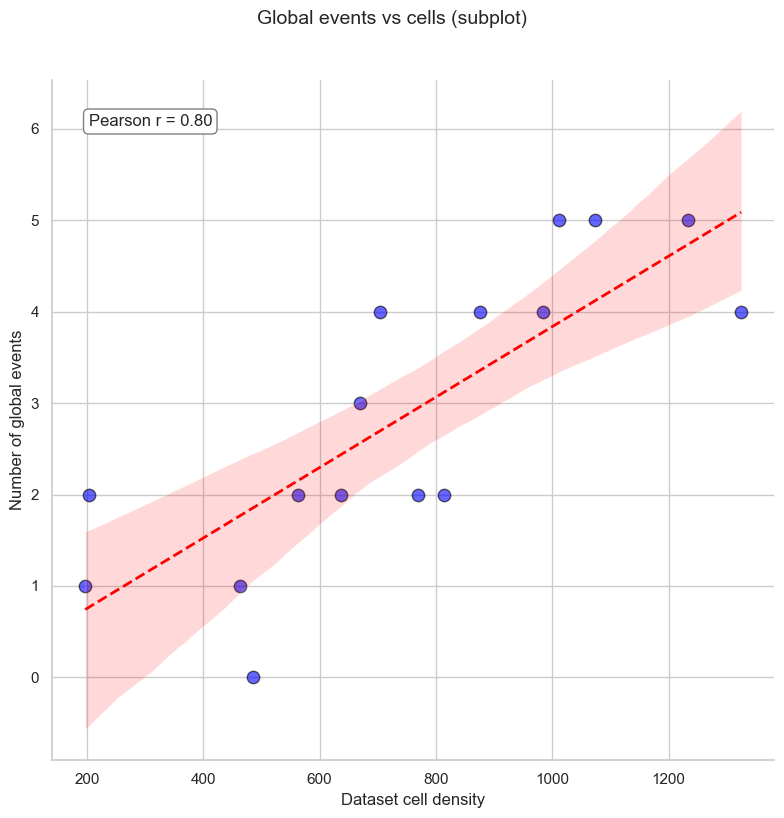

In [7]:
plot_xy_with_regression(
    data=control_experiments,
    x_col="Dataset cell density",
    y_col="Number of global events",
    corr_method="pearson",
    title="Global events vs cells (subplot)"
)

[2025-08-15 17:29:04] [INFO] calcium: plot_points_mean_std: removed 0 outliers out of 46 on 'Mean Duration (s)' (lower=-72.574, upper=229.33)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


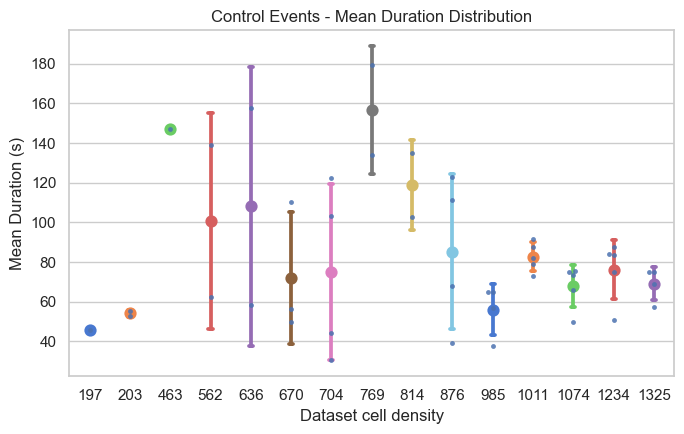

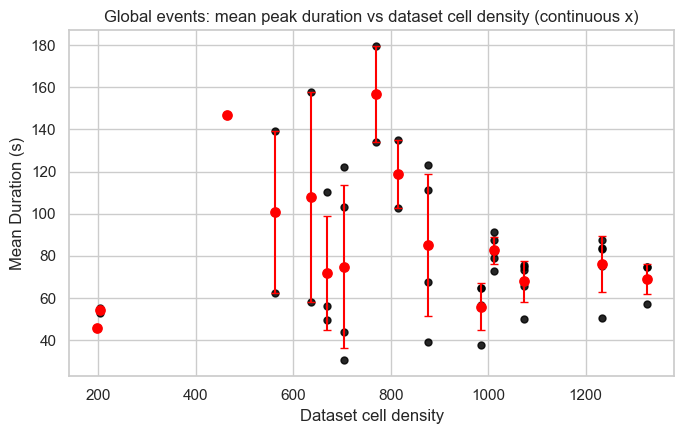

In [8]:
mapping_events_to_peaks = control_events.loc[control_events["Event type"] == "GlobalEvent", ["Event ID", "dataset"]]
subset_peaks_global_events = control_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

mean_duration_by_ge = (
    subset_peaks_global_events
    .groupby(["Dataset cell density","Event ID"])["Duration (s)"]
    .mean()
    .reset_index()
    .rename(columns={"Duration (s)": "Mean Duration (s)"})
)

plot_points_mean_std(
    df=mean_duration_by_ge,
    x="Dataset cell density",
    y="Mean Duration (s)",
    title="Control Events - Mean Duration Distribution",
    ylabel="Mean Duration (s)",
    xlabel="Dataset cell density",
    filter_outliers=True,
    outliers_bounds=(3, 3)
)

plot_points_mean_std_continuous(
    df=mean_duration_by_ge,
    x="Dataset cell density",
    y="Mean Duration (s)",
    title="Global events: mean peak duration vs dataset cell density (continuous x)",
    strategy="exact", # groups by the exact density value (use round_x_decimals=0/1 to coalesce close values)
    jitter_x=0.0,           # try 0.3 if many points overlap
)

[2025-08-15 17:29:05] [INFO] calcium: plot_points_mean_std: removed 0 outliers out of 46 on 'Mean Prominence (noise std units)' (lower=-446.64, upper=821.72)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


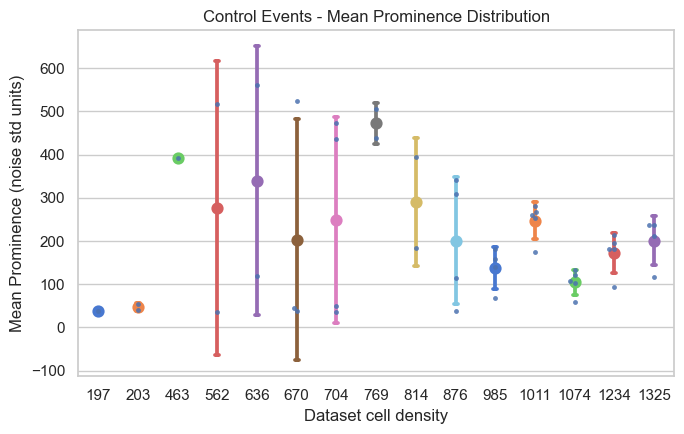

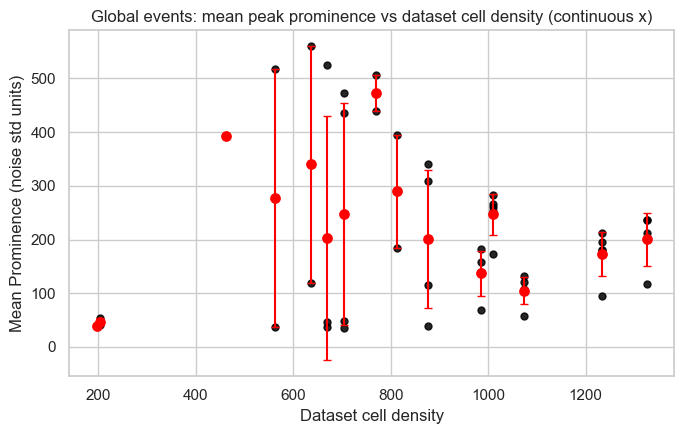

In [9]:
mean_prominence_by_ge = (
    subset_peaks_global_events
    .groupby(["Dataset cell density","Event ID"])["Prominence (noise std units)"]
    .mean()
    .reset_index()
    .rename(columns={"Prominence (noise std units)": "Mean Prominence (noise std units)"})
)

plot_points_mean_std(
    df=mean_prominence_by_ge,
    x="Dataset cell density",
    y="Mean Prominence (noise std units)",
    title="Control Events - Mean Prominence Distribution",
    ylabel="Mean Prominence (noise std units)",
    xlabel="Dataset cell density",
    filter_outliers=True,
    outliers_bounds=(3, 3)
)

plot_points_mean_std_continuous(
    df=mean_prominence_by_ge,
    x="Dataset cell density",
    y="Mean Prominence (noise std units)",
    title="Global events: mean peak prominence vs dataset cell density (continuous x)",
    strategy="exact", # groups by the exact density value (use round_x_decimals=0/1 to coalesce close values)
    jitter_x=0.0,           # try 0.3 if many points overlap
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


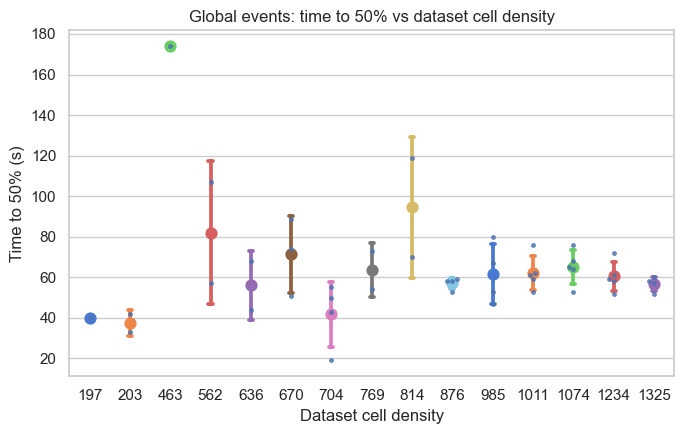

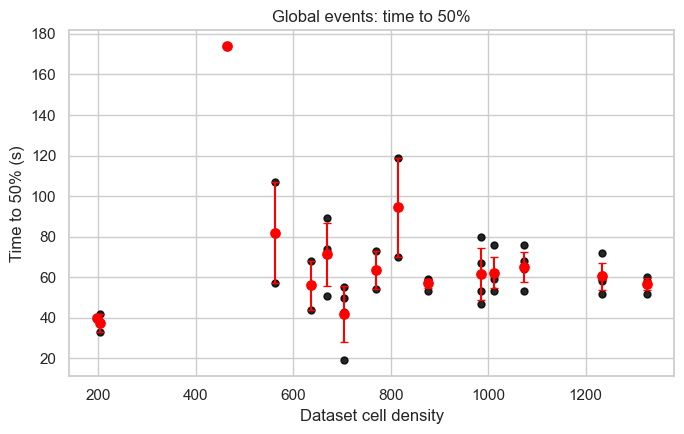

In [10]:
global_events = control_events[control_events["Event type"] == "GlobalEvent"].copy()

plot_points_mean_std(
    df=global_events,
    x="Dataset cell density",
    y="Time to 50% (s)",
    title="Global events: time to 50% vs dataset cell density",
    ylabel="Time to 50% (s)",
    xlabel="Dataset cell density"
)

plot_points_mean_std_continuous(
    df=global_events,
    x="Dataset cell density",
    y="Time to 50% (s)",
    title="Global events: time to 50%",
    ylabel="Time to 50% (s)",
    xlabel="Dataset cell density"
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


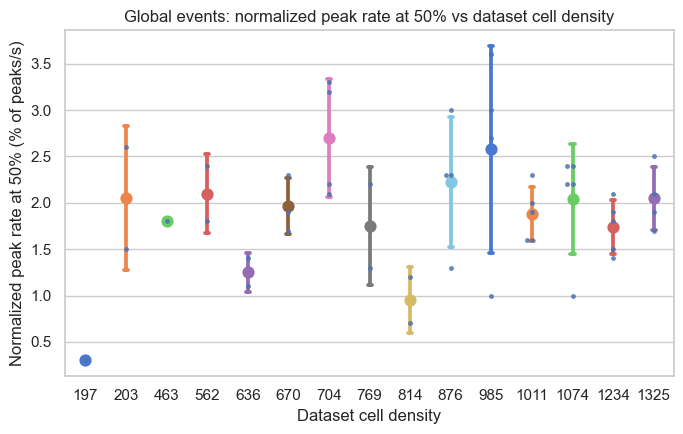

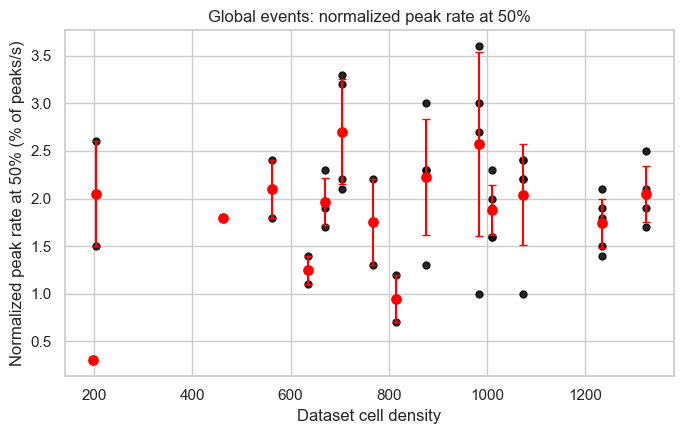

In [11]:
plot_points_mean_std(
    df=global_events,
    x="Dataset cell density",
    y="Normalized peak rate at 50% (% of peaks/s)",
    title="Global events: normalized peak rate at 50% vs dataset cell density",
    ylabel="Normalized peak rate at 50% (% of peaks/s)",
    xlabel="Dataset cell density"
)

plot_points_mean_std_continuous(
    df=global_events,
    x="Dataset cell density",
    y="Normalized peak rate at 50% (% of peaks/s)",
    title="Global events: normalized peak rate at 50%",
    ylabel="Normalized peak rate at 50% (% of peaks/s)",
    xlabel="Dataset cell density"
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


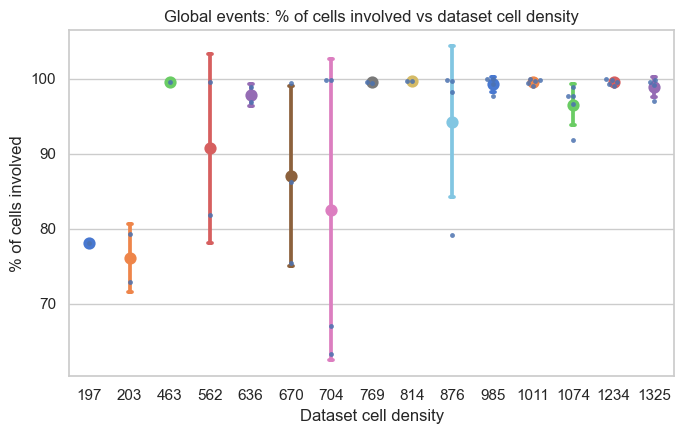

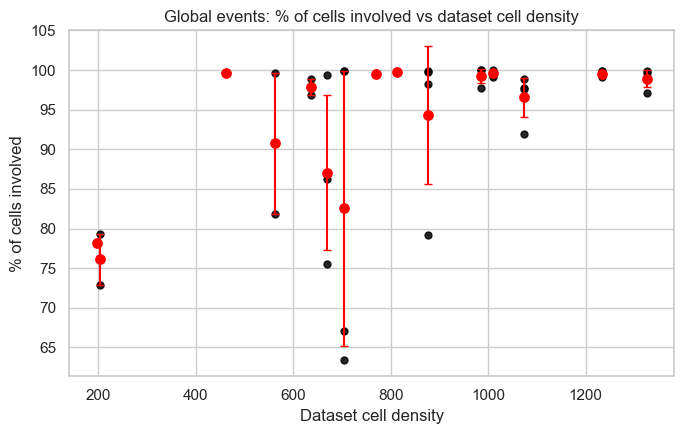

In [12]:
global_events["% of cells involved"] = (100 * global_events["Number of cells involved"] / global_events["Dataset cell density"]).round(2)

plot_points_mean_std(
    df=global_events,
    x="Dataset cell density",
    y="% of cells involved",
    title="Global events: % of cells involved vs dataset cell density",
    ylabel="% of cells involved",
    xlabel="Dataset cell density"
)

plot_points_mean_std_continuous(
    df=global_events,
    x="Dataset cell density",
    y="% of cells involved",
    title="Global events: % of cells involved vs dataset cell density",
    ylabel="% of cells involved",
    xlabel="Dataset cell density"
)

## SEQUENTIAL EVENTS

[2025-08-15 17:29:07] [INFO] calcium: plot_points_mean_std: removed 759 outliers out of 43933 on 'Duration (s)' (lower=-82.75, upper=172.75)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


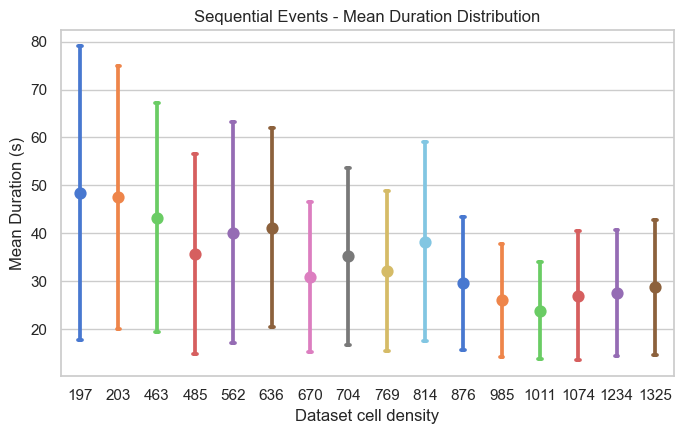

[2025-08-15 17:29:08] [INFO] calcium: plot_points_mean_std_continuous: removed 759 outliers out of 43933 on 'Duration (s)' (lower=-82.75, upper=172.75)


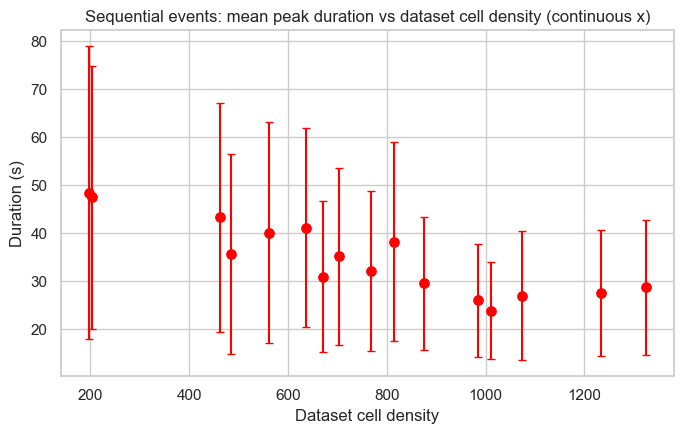

[2025-08-15 17:29:08] [INFO] calcium: plot_violin: removed 759 outliers out of 43933 on 'Duration (s)' (lower=-82.75, upper=172.75)


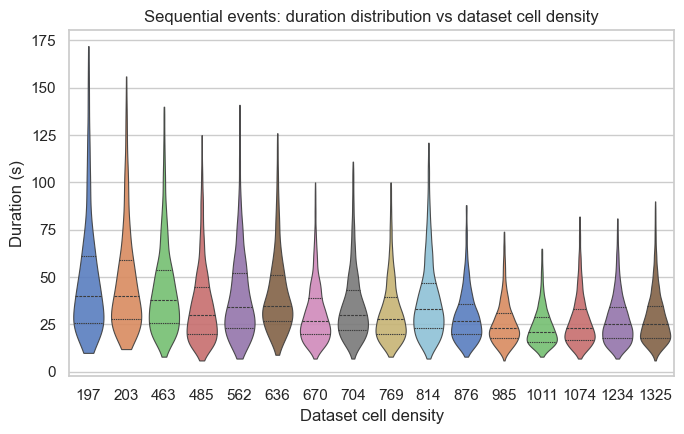

In [13]:
mapping_events_to_peaks = control_events.loc[control_events["Event type"] == "SequentialEvent", ["Event ID", "dataset"]]
subset_peaks_sequential_events = control_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

mean_duration_by_se = (
    subset_peaks_sequential_events
    .groupby(["Dataset cell density"])["Duration (s)"]
    .mean()
    .reset_index()
    .rename(columns={"Duration (s)": "Mean Duration (s)"})
)
std_duration_by_se = (
    subset_peaks_sequential_events
    .groupby(["Dataset cell density"])["Duration (s)"]
    .std()
    .reset_index()
    .rename(columns={"Duration (s)": "Std Duration (s)"})
)

plot_points_mean_std(
    df=subset_peaks_sequential_events,
    x="Dataset cell density",
    y="Duration (s)",
    title="Sequential Events - Mean Duration Distribution",
    ylabel="Mean Duration (s)",
    xlabel="Dataset cell density",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    show_points=False,
    outliers_bygroup="Dataset cell density"
)

plot_points_mean_std_continuous(
    df=subset_peaks_sequential_events,
    x="Dataset cell density",
    y="Duration (s)",
    title="Sequential events: mean peak duration vs dataset cell density (continuous x)",
    strategy="exact", # groups by the exact density value (use round_x_decimals=0/1 to coalesce close values)
    jitter_x=0.0,           # try 0.3 if many points overlap
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density"
)

plot_violin(
    df=subset_peaks_sequential_events,
    x="Dataset cell density",
    y="Duration (s)",
    title="Sequential events: duration distribution vs dataset cell density",
    xlabel="Dataset cell density",
    ylabel="Duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density"
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


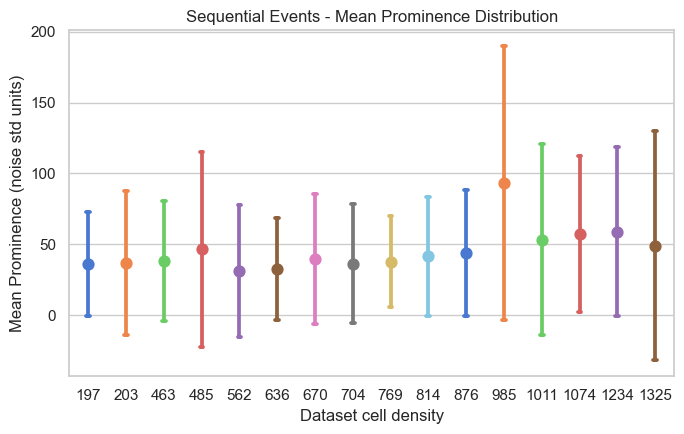

[2025-08-15 17:29:09] [INFO] calcium: plot_points_mean_std_continuous: removed 1432 outliers out of 43933 on 'Prominence (noise std units)' (lower=-243.1, upper=392.5)


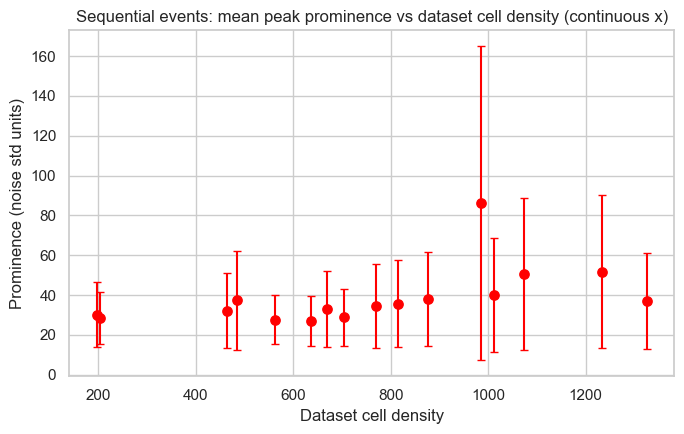

[2025-08-15 17:29:09] [INFO] calcium: plot_violin: removed 1432 outliers out of 43933 on 'Prominence (noise std units)' (lower=-243.1, upper=392.5)


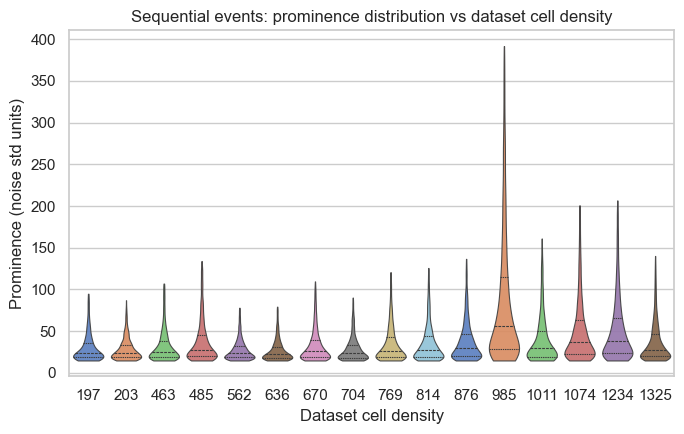

In [14]:
mean_prominence_by_se = (
    subset_peaks_sequential_events
    .groupby(["Dataset cell density"])["Prominence (noise std units)"]
    .mean()
    .reset_index()
    .rename(columns={"Prominence (noise std units)": "Mean Prominence (noise std units)"})
)

plot_points_mean_std(
    df=subset_peaks_sequential_events,
    x="Dataset cell density",
    y="Prominence (noise std units)",
    title="Sequential Events - Mean Prominence Distribution",
    ylabel="Mean Prominence (noise std units)",
    xlabel="Dataset cell density",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    show_points=False
)

plot_points_mean_std_continuous(
    df=subset_peaks_sequential_events,
    x="Dataset cell density",
    y="Prominence (noise std units)",
    title="Sequential events: mean peak prominence vs dataset cell density (continuous x)",
    strategy="exact", # groups by the exact density value (use round_x_decimals=0/1 to coalesce close values)
    jitter_x=0.0,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    show_points=False,
    outliers_bygroup="Dataset cell density"
)

plot_violin(
    df=subset_peaks_sequential_events,
    x="Dataset cell density",
    y="Prominence (noise std units)",
    title="Sequential events: prominence distribution vs dataset cell density",
    xlabel="Dataset cell density",
    ylabel="Prominence (noise std units)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density"
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


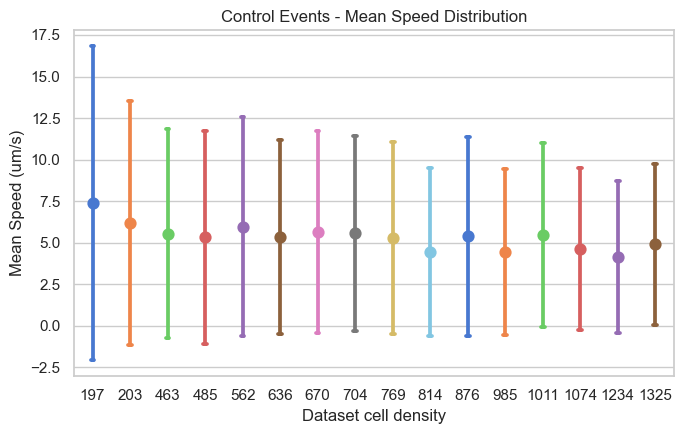

[2025-08-15 17:29:10] [INFO] calcium: plot_points_mean_std_continuous: removed 1316 outliers out of 32533 on 'Speed (um/s)' (lower=-16.555, upper=25.385)


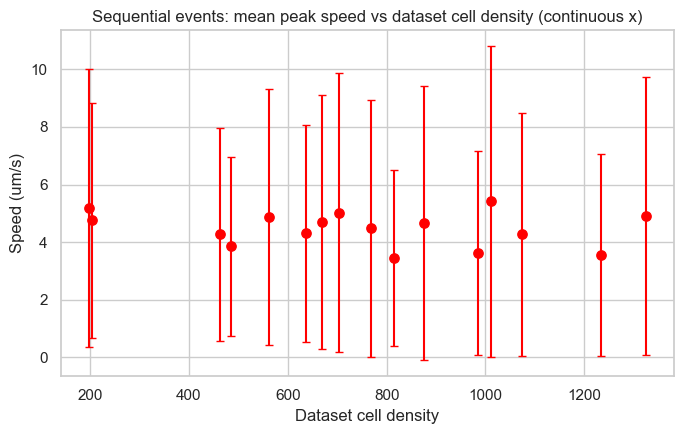

[2025-08-15 17:29:10] [INFO] calcium: plot_violin: removed 1316 outliers out of 32533 on 'Speed (um/s)' (lower=-16.555, upper=25.385)


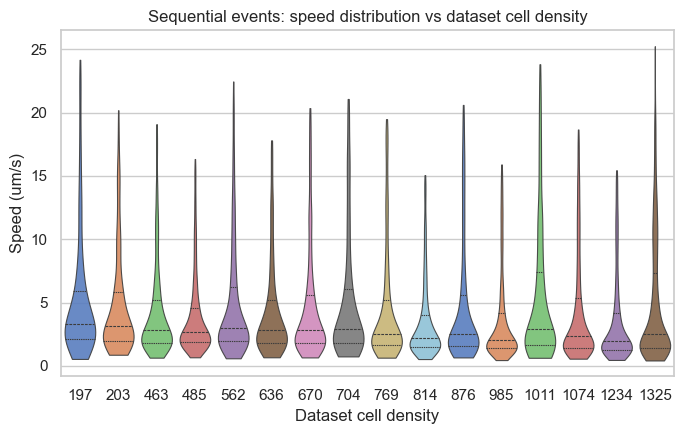

In [15]:
plot_points_mean_std(
    df=control_communications,
    x="Dataset cell density",
    y="Speed (um/s)",
    title="Control Events - Mean Speed Distribution",
    ylabel="Mean Speed (um/s)",
    xlabel="Dataset cell density",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    show_points=False
)

plot_points_mean_std_continuous(
    df=control_communications,
    x="Dataset cell density",
    y="Speed (um/s)",
    title="Sequential events: mean peak speed vs dataset cell density (continuous x)",
    strategy="exact", # groups by the exact density value (use round_x_decimals=0/1 to coalesce close values)
    jitter_x=0.0,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    show_points=False
)

plot_violin(
    df=control_communications,
    x="Dataset cell density",
    y="Speed (um/s)",
    title="Sequential events: speed distribution vs dataset cell density",
    xlabel="Dataset cell density",
    ylabel="Speed (um/s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density"
)

## INDIVIDUAL EVENTS

[2025-08-15 17:29:11] [INFO] calcium: plot_points_mean_std: removed 278 outliers out of 15070 on 'Duration (s)' (lower=-86, upper=173)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


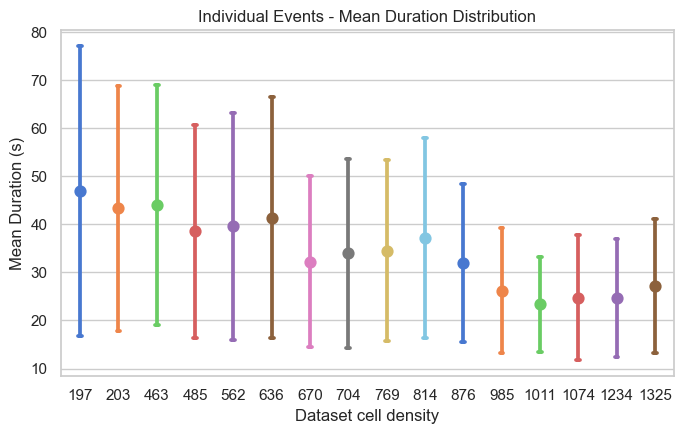

[2025-08-15 17:29:11] [INFO] calcium: plot_points_mean_std_continuous: removed 278 outliers out of 15070 on 'Duration (s)' (lower=-86, upper=173)


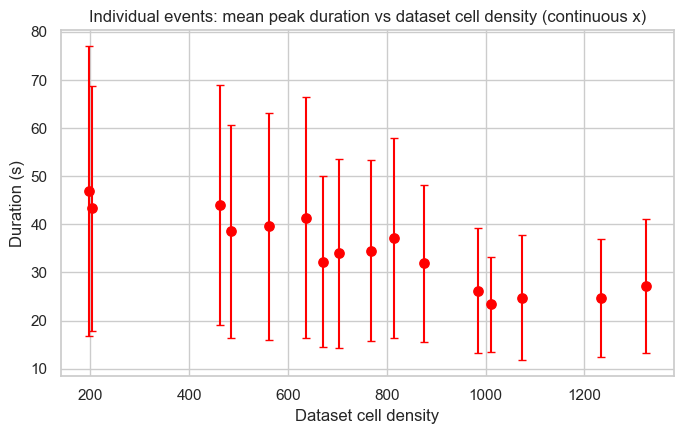

[2025-08-15 17:29:12] [INFO] calcium: plot_violin: removed 278 outliers out of 15070 on 'Duration (s)' (lower=-86, upper=173)


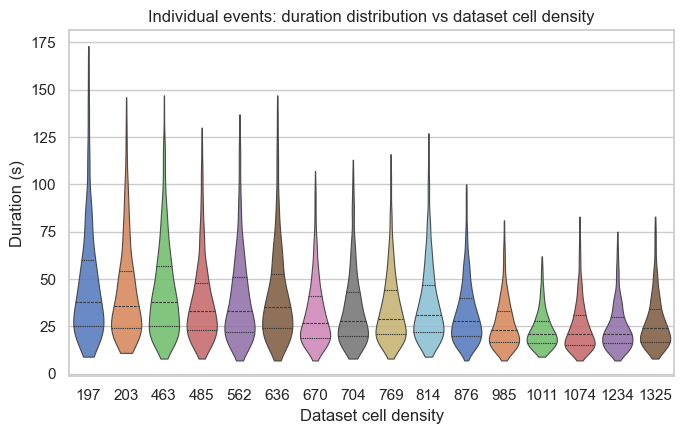

In [16]:
individual_peaks = control_peaks[control_peaks["In event"] == "individual"].copy()

plot_points_mean_std(
    df=individual_peaks,
    x="Dataset cell density",
    y="Duration (s)",
    title="Individual Events - Mean Duration Distribution",
    ylabel="Mean Duration (s)",
    xlabel="Dataset cell density",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    show_points=False,
    outliers_bygroup="Dataset cell density"
)

plot_points_mean_std_continuous(
    df=individual_peaks,
    x="Dataset cell density",
    y="Duration (s)",
    title="Individual events: mean peak duration vs dataset cell density (continuous x)",
    strategy="exact", # groups by the exact density value (use round_x_decimals=0/1 to coalesce close values)
    jitter_x=0.0,           # try 0.3 if many points overlap
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density"
)

plot_violin(
    df=individual_peaks,
    x="Dataset cell density",
    y="Duration (s)",
    title="Individual events: duration distribution vs dataset cell density",
    xlabel="Dataset cell density",
    ylabel="Duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density"
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1049: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


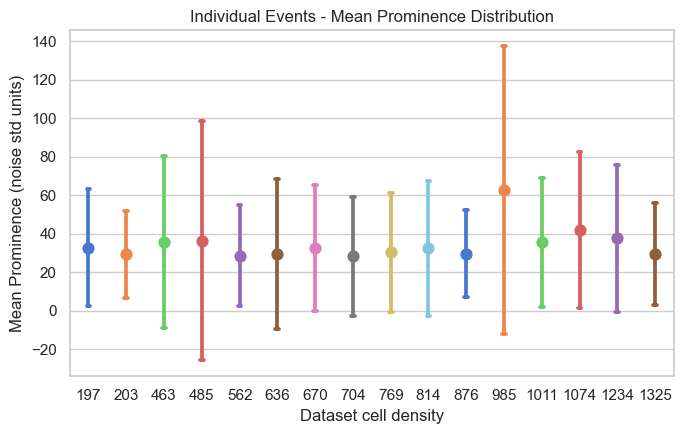

[2025-08-15 17:29:13] [INFO] calcium: plot_points_mean_std_continuous: removed 630 outliers out of 15070 on 'Prominence (noise std units)' (lower=-130.28, upper=219.9)


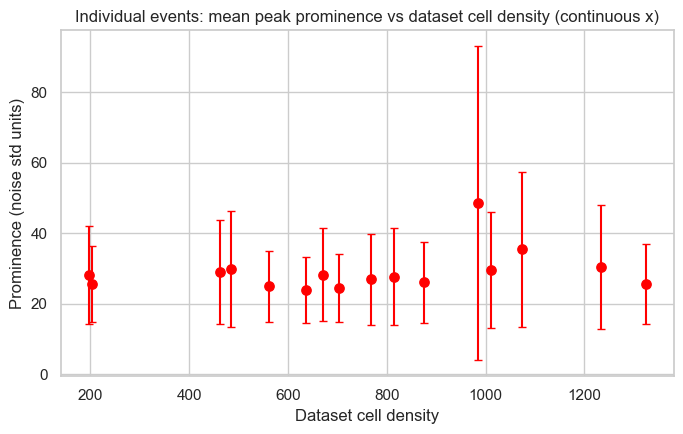

[2025-08-15 17:29:13] [INFO] calcium: plot_violin: removed 630 outliers out of 15070 on 'Prominence (noise std units)' (lower=-130.28, upper=219.9)


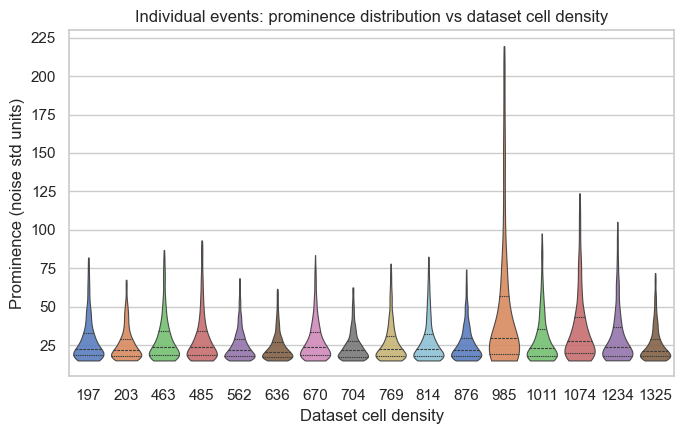

: 

In [ ]:
plot_points_mean_std(
    df=individual_peaks,
    x="Dataset cell density",
    y="Prominence (noise std units)",
    title="Individual Events - Mean Prominence Distribution",
    ylabel="Mean Prominence (noise std units)",
    xlabel="Dataset cell density",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    show_points=False
)

plot_points_mean_std_continuous(
    df=individual_peaks,
    x="Dataset cell density",
    y="Prominence (noise std units)",
    title="Individual events: mean peak prominence vs dataset cell density (continuous x)",
    strategy="exact", # groups by the exact density value (use round_x_decimals=0/1 to coalesce close values)
    jitter_x=0.0,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    show_points=False,
    outliers_bygroup="Dataset cell density"
)

plot_violin(
    df=individual_peaks,
    x="Dataset cell density",
    y="Prominence (noise std units)",
    title="Individual events: prominence distribution vs dataset cell density",
    xlabel="Dataset cell density",
    ylabel="Prominence (noise std units)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density"
)